### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Миронов Дмитрий Андреевич
##### Группа:   НПИбд-02-21

## Москва 2024
***


### Вариант № 6

Wine Data Set  

Название файла: wine.data

Ссылка: http://archive.ics.uci.edu/ml/datasets/Wine

Первый признак: alcohol (столбец No 2)

Второй признак: color-intensity (столбец No 11)

Третий признак: optical-density (столбец No 13)

Класс: cultivar (столбец No 1)

Метод обработки пропущенных значений – медиана признака

Метод нормализации признаков – стандартизация

Алгоритм снижения размерности данных – метод главных компонент (PCA)

Метод валидации модели – кросс-валидация по 5 блокам

Показатель качества модели – доля верных ответов (accuracy)

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

column_names = ["cultivar","alcohol", "3", "4", "5", "6", "7",
                "8", "9", "10", "color-intensity", "12", "optical-density", "14"]
data = pd.read_csv(url, names = column_names)
data.head()

,cultivar,alcohol,3,4,5,6,7,8,9,10,color-intensity,12,optical-density,14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
selected_columns = ['cultivar', 'alcohol', 'color-intensity', 'optical-density']
df = data[selected_columns]

df.head()

,cultivar,alcohol,color-intensity,optical-density
0,1,14.23,5.64,3.92
1,1,13.20,4.38,3.40
2,1,13.16,5.68,3.17
3,1,14.37,7.80,3.45
4,1,13.24,4.32,2.93


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score). Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.


In [ ]:
df = df.replace('?', np.NaN)
df['alcohol'] = pd.to_numeric(df['alcohol'])
df['color-intensity'] = pd.to_numeric(df['color-intensity'])
df['optical-density'] = pd.to_numeric(df['optical-density'])

df.isnull().sum()

,0
cultivar,0
alcohol,0
color-intensity,0
optical-density,0


Среди класса меток отсутсвуют пропущенные значения.

In [ ]:
df.dropna(subset=['cultivar'], inplace=True)

In [ ]:
df['color-intensity'] = df.groupby('cultivar')['color-intensity'].transform(lambda x: x.fillna(x.mean()))
df['optical-density'] = df.groupby('cultivar')['optical-density'].transform(lambda x: x.fillna(x.mean()))

df.isnull().sum()

,0
cultivar,0
alcohol,0
color-intensity,0
optical-density,0


Пропущеннные значения в наборе данных присуствуют, но не в классе меток, мы не сократили записи, поэтому для примера удалим точки с выбросами при помощи стандартизованной оценки (Z-score).

In [ ]:
initial_count = df.shape[0]

z_scores = np.abs(stats.zscore(df[['alcohol', 'color-intensity', 'optical-density']]))
df = df[(z_scores < 3).all(axis=1)]

final_count = df.shape[0]
removed_outliers = initial_count - final_count
percentage_removed = (removed_outliers / initial_count) * 100

print(f"Количество удалённых выбросов: {removed_outliers}")
print(f"Процент удалённых выбросов: {percentage_removed:.2f}%")

Количество удалённых выбросов: 1
Процент удалённых выбросов: 0.56%


In [ ]:
class_counts = df["cultivar"].value_counts()
class_counts

,count
cultivar,
2,71
1,59
3,47


Количество различных меток больше 4, соединим наименьшие из них.

In [ ]:
df

,cultivar,alcohol,color-intensity,optical-density
0,1,14.23,5.64,3.92
1,1,13.20,4.38,3.40
2,1,13.16,5.68,3.17
3,1,14.37,7.80,3.45
4,1,13.24,4.32,2.93
...,...,...,...,...
173,3,13.71,7.70,1.74
174,3,13.40,7.30,1.56
175,3,13.27,10.20,1.56
176,3,13.17,9.30,1.62


3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [ ]:
features = ['alcohol', 'color-intensity', 'optical-density']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
df.loc[:, features] = x
df.head()

,cultivar,alcohol,color-intensity,optical-density
0,1,1.535582,0.279855,1.841950
1,1,0.256912,-0.282730,1.107786
2,1,0.207255,0.297714,0.783060
3,1,1.709382,1.244286,1.178379
4,1,0.306569,-0.309520,0.444215


4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

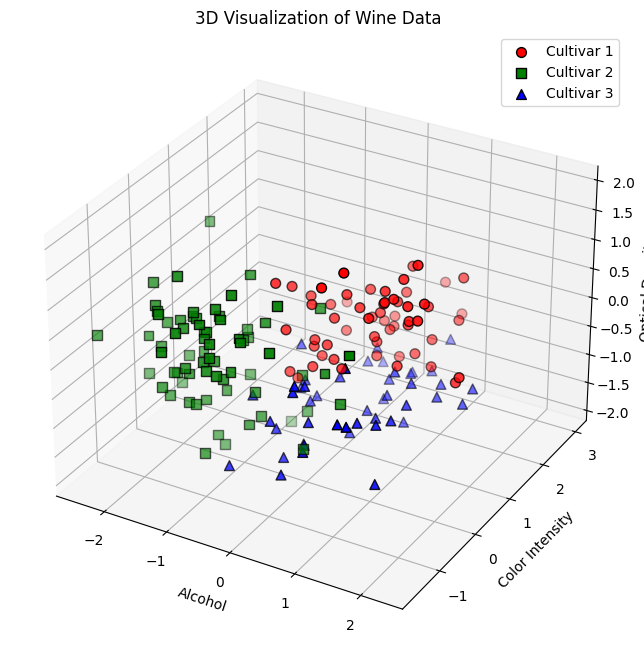

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
markers = ['o', 's', '^']

for i, class_value in enumerate(df['cultivar'].unique()):
    subset = df[df['cultivar'] == class_value]
    ax.scatter(subset['alcohol'], subset['color-intensity'], subset['optical-density'],
               c=colors[i], marker=markers[i], label=f'Cultivar {class_value}', s=50, edgecolor='k')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Color Intensity')
ax.set_zlabel('Optical Density')
ax.set_title('3D Visualization of Wine Data')
ax.legend()

plt.show()

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

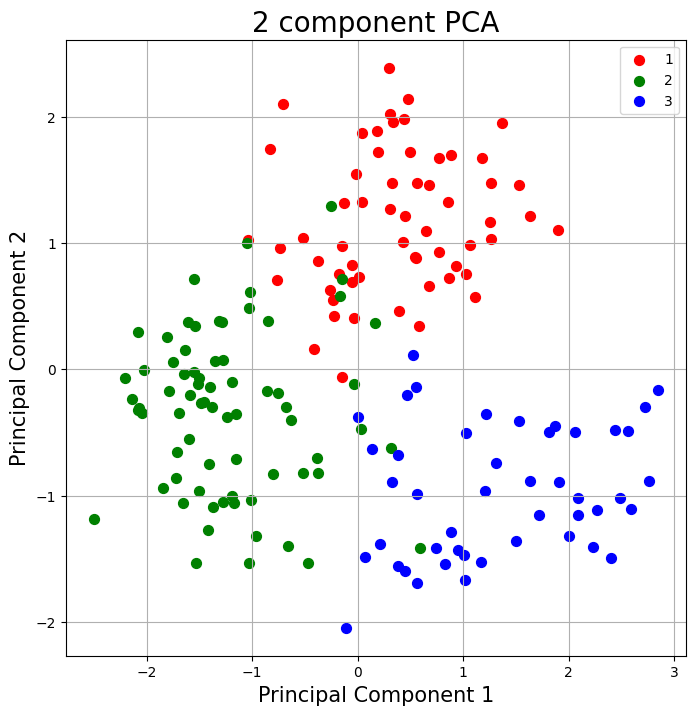

In [ ]:
X = df[['alcohol', 'color-intensity', 'optical-density']]
y = df['cultivar']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['cultivar']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = df['cultivar'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cultivar'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

min_error  = 0.0
optimal_k  = -1
for k in range(1, 10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > min_error :
        optimal_k  = k
        min_error  = score

print(f'Оптимальное значение k: {optimal_k }')
print(f'Минимальная доля ошибок: {min_error }')

Оптимальное значение k: 8
Минимальная доля ошибок: 0.9333333333333333


7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=optimal_k)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred_all = []
y_true_all = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  y_pred_all.extend(y_pred)
  y_true_all.extend(y_test)

print("Classification Report:\n", classification_report(y_true_all, y_pred_all))
print("Confusion Matrix:\n", confusion_matrix(y_true_all, y_pred_all))

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.98      0.93        59
           2       0.97      0.87      0.92        71
           3       0.94      0.94      0.94        47

    accuracy                           0.93       177
   macro avg       0.93      0.93      0.93       177
weighted avg       0.93      0.93      0.93       177

Confusion Matrix:
 [[58  1  0]
 [ 6 62  3]
 [ 2  1 44]]


8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
* наивного байесовского классификатора  
* классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df[['alcohol', 'color-intensity', 'optical-density']]
y = df['cultivar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132, 3), (45, 3), (132,), (45,))

Наивный байесовский классификатор:

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train,y_train);

y_pred_nbc = nbc.predict(X_test)

print("Отчет о классификации:\n", classification_report(y_test, y_pred_nbc, zero_division=0))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_nbc))

Отчет о классификации:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.84      0.89      0.86        18
           3       0.91      0.83      0.87        12

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Матрица ошибок:
 [[14  1  0]
 [ 1 16  1]
 [ 0  2 10]]


Классификатор K ближайших соседей с оптимальным значением K:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Отчет о классификации:\n", classification_report(y_test, y_pred_knn))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred_knn))

Отчет о классификации:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.89      0.94      0.92        18
           3       1.00      0.83      0.91        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Матрица ошибок:
 [[15  0  0]
 [ 1 17  0]
 [ 0  2 10]]


9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

Оценка качества наивного байесовского классификатора:

In [ ]:
# Evaluate Naive Bayes Classifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_nbc = cross_val_score(nbc, X, y, cv=kf, scoring='accuracy')

print("Naive Bayes - Average accuracy (variance): %.2f (%.2f)" % (scores_nbc.mean(), scores_nbc.var()))

Naive Bayes - Average accuracy (variance): 0.92 (0.00)


Оценка качества классификатора метода K ближайших соседей:

In [ ]:
# Evaluate K Nearest Neighbors Classifier
scores_knn = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

print("KNN - Average accuracy (variance): %.2f (%.2f)" % (scores_knn.mean(), scores_knn.var()))

KNN - Average accuracy (variance): 0.93 (0.00)


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

У классификатора метода K ближайших соседей более высокое среднее значение.

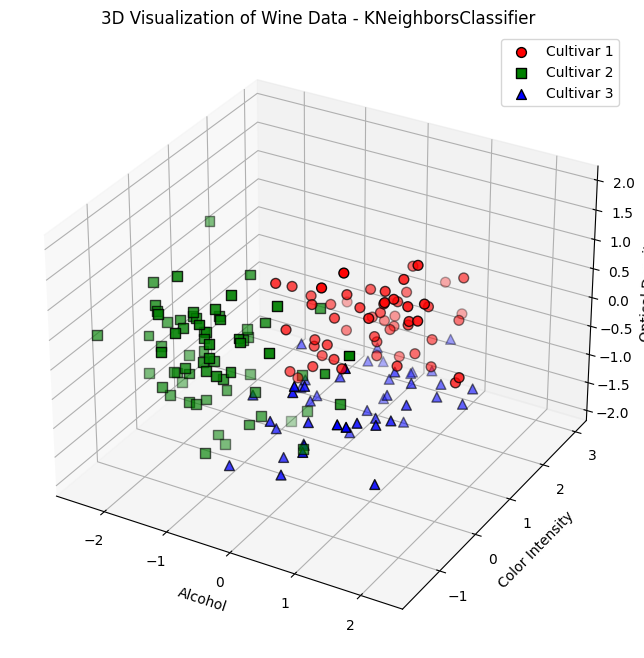

In [ ]:
# Determine the best classifier based on average accuracy
best_classifier = nbc if scores_nbc.mean() > scores_knn.mean() else knn

# Predict using the best classifier
y_pred = best_classifier.predict(X)

# Visualize the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
markers = ['o', 's', '^']

for i, class_value in enumerate(df['cultivar'].unique()):
    subset = df[df['cultivar'] == class_value]
    ax.scatter(subset['alcohol'], subset['color-intensity'], subset['optical-density'],
               c=colors[i], marker=markers[i], label=f'Cultivar {class_value}', s=50, edgecolor='k')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Color Intensity')
ax.set_zlabel('Optical Density')
ax.set_title(f'3D Visualization of Wine Data - {best_classifier.__class__.__name__}')
ax.legend()

plt.show()